In [1]:
import pandas as pd
import nflfastpy as nfl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [36]:
df = pd.DataFrame()

for x in range(2015,2022):
    yearly_df = nfl.load_pbp_data(x)
    df = pd.concat([df, yearly_df])

In [4]:
df.shape

(289707, 372)

In [56]:
for column in df.columns:
    if 'rush' in column:
        print(column)
    elif 'distance' in column:
        print(column)
    elif 'yardline' in column:
        print(column)
    elif 'two' in column:
        print(column)

yardline_100
kick_distance
two_point_conv_result
two_point_conversion_prob
total_home_rush_epa
total_away_rush_epa
total_home_rush_wpa
total_away_rush_wpa
first_down_rush
rush_attempt
rush_touchdown
two_point_attempt
lateral_rush
rusher_player_id
rusher_player_name
rushing_yards
lateral_rusher_player_id
lateral_rusher_player_name
lateral_rushing_yards
defensive_two_point_attempt
defensive_two_point_conv
rusher
rusher_jersey_number
rush
rusher_id


In [57]:
rushing_df_filter = (df['rush_attempt'] == 1) & (df['two_point_attempt'] == 0)

rushing_df = df.loc[rushing_df_filter, ['rush_attempt', 'rush_touchdown', 'yardline_100']]

prob_rush_df = rushing_df.groupby('yardline_100')['rush_touchdown'].value_counts(normalize=True)
"""
Grouping by yardline of where each rush attempt began and then using value_counts to count if the attempt resulted in a touchdown.
Within the value_counts, the argument normalize is set to True, allowing for calculation of the proportion of rush attempts that 
result in touchdowns from each yardline. Doing this transforms the dataframe into a series so we must convert it back to a dataframe.
"""
# prob_rush_df = prob_rush_df.to_frame(name = 'probability_of_td')
prob_rush_df = pd.DataFrame({
    'probability_of_touchdown': prob_rush_df.values
}, index=prob_rush_df.index).reset_index()
prob_rush_df.head()

,yardline_100,rush_touchdown,probability_of_touchdown
0,1.0,1.0,0.564392
1,1.0,0.0,0.435608
2,2.0,0.0,0.565806
3,2.0,1.0,0.434194
4,3.0,0.0,0.662411


In [58]:
prob_rush_df = prob_rush_df.loc[prob_rush_df['rush_touchdown'] == 1, ['yardline_100', 'probability_of_touchdown']].reset_index()
prob_rush_df = prob_rush_df.drop('index', axis=1)
prob_rush_df.head()

,yardline_100,probability_of_touchdown
0,1.0,0.564392
1,2.0,0.434194
2,3.0,0.337589
3,4.0,0.295552
4,5.0,0.228758


In [41]:
prob_rush_df.shape

(92, 2)

<AxesSubplot:xlabel='yardline_100'>

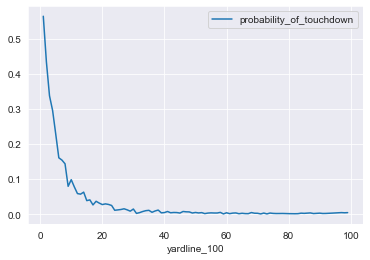

In [42]:
# plt.plot(data=prob_rush_df, x='yardline_100', y='probability_of_touchdown')
# plt.title('Probability of scoring a rushing TD on an attempt X yds from endzone')
# plt.xlabel('Distance from endzone')

prob_rush_df.plot(x='yardline_100', y='probability_of_touchdown')

In [43]:
df_2021 = nfl.load_pbp_data(2021)
df_2021.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [47]:
roster_df = nfl.load_roster_data(2021)
roster_df.head()

,season,team,position,depth_chart_position,jersey_number,status,full_name,first_name,last_name,birth_date,...,espn_id,sportradar_id,yahoo_id,rotowire_id,pff_id,pfr_id,fantasy_data_id,sleeper_id,years_exp,headshot_url
0,2021,ARI,CB,RCB,7,Active,Byron Murphy,Byron,Murphy,1998-01-18,...,4038999.0,c025b513-9431-4097-bc25-9777bf08f846,31865.0,13560.0,44027.0,MurpBy00,20888.0,5864,3.0,https://static.www.nfl.com/image/private/f_aut...
1,2021,ARI,CB,LCB,21,Active,Breon Borders,Breon,Borders,1995-07-22,...,3048663.0,d0fa2103-69a1-4ed0-a3cd-4eb8d5e342c2,30623.0,12097.0,39398.0,BordBr00,19300.0,4439,5.0,https://static.www.nfl.com/image/private/f_aut...
2,2021,ARI,CB,RCB,33,Active,Antonio Hamilton,Antonio,Hamilton,1993-01-24,...,3056354.0,9bc107dc-1920-49db-b009-436d1a77955d,29957.0,11518.0,11353.0,HamiAn01,18658.0,3838,6.0,https://static.www.nfl.com/image/private/f_aut...
3,2021,ARI,CB,NaN,39,Active,Jace Whittaker,Jace,Whittaker,1995-07-16,...,3821572.0,528bf5c9-1d23-40c3-adda-df21f8f0e2ab,33089.0,14793.0,50465.0,WhitJa05,22171.0,7169,2.0,https://static.www.nfl.com/image/private/f_aut...
4,2021,ARI,CB,NaN,24,Active,Bashaud Breeland,Bashaud,Breeland,1992-01-30,...,16890.0,ba905b34-8412-4553-9055-3460368cc608,27630.0,9648.0,8737.0,BreeBa00,16407.0,2091,8.0,https://static.www.nfl.com/image/private/f_aut...


In [48]:
rb_roster_df = roster_df.loc[roster_df['position'] == 'RB']['gsis_id']

rb_roster_df.head()

60    00-0034331
61    00-0034681
62    00-0036383
63    00-0033553
64    00-0035825
Name: gsis_id, dtype: object

In [51]:
from nflfastpy.utils import convert_to_gsis_id
from nflfastpy import default_headshot

rush_2021_df = df_2021.loc[df_2021['rush_attempt']== 1, ['rusher_id','rusher_player_name','rush_attempt', 'rush_touchdown', 'yardline_100']]
rush_2021_df = rush_2021_df.loc[rush_2021_df['rusher_id'].notnull()]
rush_2021_df['gsis_id'] = rush_2021_df['rusher_id'].apply(convert_to_gsis_id)

rush_2021_df.head()

,rusher_id,rusher_player_name,rush_attempt,rush_touchdown,yardline_100,gsis_id
2,00-0032764,D.Henry,1.0,0.0,75.0,
7,00-0035228,K.Murray,1.0,0.0,23.0,
10,00-0034681,C.Edmonds,1.0,0.0,9.0,
18,00-0032764,D.Henry,1.0,0.0,80.0,
28,00-0032764,D.Henry,1.0,0.0,75.0,


In [59]:
rush_2021_df = rush_2021_df.merge(prob_rush_df, how = 'left', on = 'yardline_100')

rush_2021_df.head(20)

,rusher_id,rusher_player_name,rush_attempt,rush_touchdown,yardline_100,gsis_id,probability_of_touchdown_x,probability_of_touchdown_y,probability_of_touchdown_x,probability_of_touchdown_y
0,00-0032764,D.Henry,1.0,0.0,75.0,,0.002249,0.002249,0.002249,0.002249
1,00-0035228,K.Murray,1.0,0.0,23.0,,0.024876,0.024876,0.024876,0.024876
2,00-0034681,C.Edmonds,1.0,0.0,9.0,,0.079480,0.079480,0.079480,0.079480
3,00-0032764,D.Henry,1.0,0.0,80.0,,0.001558,0.001558,0.001558,0.001558
4,00-0032764,D.Henry,1.0,0.0,75.0,,0.002249,0.002249,0.002249,0.002249
5,00-0032764,D.Henry,1.0,0.0,73.0,,0.000837,0.000837,0.000837,0.000837
6,00-0034681,C.Edmonds,1.0,0.0,65.0,,0.002581,0.002581,0.002581,0.002581
7,00-0032764,D.Henry,1.0,0.0,68.0,,0.004598,0.004598,0.004598,0.004598
8,00-0032764,D.Henry,1.0,0.0,69.0,,0.002793,0.002793,0.002793,0.002793
9,00-0033553,J.Conner,1.0,0.0,45.0,,0.003247,0.003247,0.003247,0.003247


In [62]:
prob_rush_df.head()


roster_df = roster_df.loc[roster_df['team.season'] == 2019]

air_yards_df = df.loc[df['pass_attempt'] == 1, ['receiver_player_id', 'receiver_player_name', 'posteam', 'air_yards']]

air_yards_df = air_yards_df.loc[air_yards_df['receiver_player_id'].notnull()]

air_yards_df['gsis_id'] = air_yards_df['receiver_player_id'].apply(convert_to_gsis_id)

#grabbing the top 5 air yards
top_5 = air_yards_df.groupby('gsis_id')['air_yards'].sum().sort_values(ascending=False)[:5].index.unique()

air_yards_df = air_yards_df.loc[air_yards_df['gsis_id'].isin(top_5)]

air_yards_df.head()

,yardline_100,probability_of_touchdown
0,1.0,0.564392
1,2.0,0.434194
2,3.0,0.337589
3,4.0,0.295552
4,5.0,0.228758
